In [ ]:
%load_ext autoreload
%autoreload 2

import json
import os
import pickle
from collections import defaultdict
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
from matplotlib.lines import Line2D

from plot_utils import (load_chid, median_score_compound, median_score_single,
                        npflatten, plot_wrapper,
                        ratio_active_compound, ratio_active_single)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
# from svglib.svglib import svg2rlg
# from reportlab.graphics import renderPDF

from IPython.display import display, SVG
def forfor(a):
    return [item for sublist in a for item in sublist]

def m7s(smiles):
    return Chem.MolFromSmiles(smiles)

from sklearn.neighbors import NearestNeighbors
def get_dists(X, Y):
    neigh = NearestNeighbors(50, 0.4, metric='jaccard', algorithm='brute')
    neigh.fit(X)
    dist, idx = neigh.kneighbors(Y)
    return dist, idx

from utils import ecfp
from collections import Counter

In [ ]:
# rcParams.update(matplotlib.rcParamsDefault)
params = {
    #    'axes.labelsize': 8,
    'font.size': 14,

    #    'legend.fontsize': 14,
    #    'xtick.labelsize': 10,
    #    'ytick.labelsize': 10,
    'text.usetex': False,
    #    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)

columns = ['AssayID', 'TargetName', 'TargetID']
rows = [('CHEMBL3888429', 'JAK2', 'CHEMBL2971'),
        ('CHEMBL1909203', 'EGFR', 'CHEMBL203'),
        ('CHEMBL1909140', 'DRD2', 'CHEMBL217')]

assay_info = pd.DataFrame(rows, columns=columns)
chid2name = dict(zip(assay_info['AssayID'], assay_info['TargetName']))

order = ('Split1', 'Split2', 'Split1_alt')
col_dict = dict(zip(order, ['blue', 'red', 'green']))
col_dict2 = dict(zip(order, ['cyan', 'magenta', 'green']))
legend_dict = dict(zip(order, ['Optimization', 'Data control', 'Model control']))
chids = ['CHEMBL3888429', 'CHEMBL1909203', 'CHEMBL1909140']

In [ ]:
def get_smiles(si, so):
    

    return smiles_train, smiles_test

In [ ]:
chid2name

{'CHEMBL3888429': 'JAK2', 'CHEMBL1909203': 'EGFR', 'CHEMBL1909140': 'DRD2'}

In [ ]:
results_dir = Path('./results/goal_directed_new/')
from collections import defaultdict

all_smiles = {}
files = glob('./assays/processed/*')
for f in files:
    df = pd.read_csv(f)
    chid = os.path.basename(f).split('.')[0]
    all_smiles[chid2name[chid]] = list(df.smiles[df.label==1])

In [ ]:
with open('data/guacamol_v1_train.smiles.can') as f:
    chembl_smiles = f.read().split()
    
random_chembl = np.random.choice(chembl_smiles, 10000)

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
for name, smiles in all_smiles.items():
    print(name)
    r = np.random.permutation(smiles)
    half = len(r)//2
    s1 = r[:half]
    s2 = r[half:]
    e1 = np.array(ecfp(s1), dtype=bool)
    e2 = np.array(ecfp(s2), dtype=bool)
    e3 = np.array(ecfp(random_chembl), dtype=bool)
    
#     print(pairwise_distances(e1, e2, metric='jaccard', n_jobs=8).mean())
#     print(pairwise_distances(e1, e3, metric='jaccard', n_jobs=8).mean())
    
    print(get_dists(e1, e2)[0][:,0].mean())
    print(get_dists(e1, e3)[0][:,0].mean())
    

EGFR
0.747027335372877
0.8094585077406308
JAK2
0.18663782737130258
0.820671972173154
DRD2
0.5424966059501904
0.8041662000218955


graph_ga
0.02135037697404537
0.007827228722840083
-0.015585298903043925
-0.0018897674684501353
0.025790811962176058
0.008761094896230786
0.02188967469945588
0.008899268040083074
0.024721614379130816
0.004668339541490107
0.0014754505331474289
0.08463754298724563
0.26586803941176057
0.3425871988566872
0.0
0.14240837284923502
0.1352452529108978
0.18946589083291662
0.418114106825611
0.11639441439657366
0.2553062194506756
0.2040535318793591
0.06821277424741662
0.02259848242831322
0.026374067921175078
0.5489713791276426
0.15999385938270874
0.008521153351686427
-0.010599600365281266
0.17619713636939247
lstm_hc
0.050468902495307916
0.0822288747210563
0.039934889549923386
-0.000652486948890781
0.0710736709503381
0.0013586533226175083
0.05466631495875345
0.06314624721296051
-0.0009300928403084954
-0.004475211839011695
0.09237683935469887
0.0
0.03627141987944423
0.18616284374910674
0.013096923208140869
0.12614403396604174
0.002770408312100472
0.09525852459436707
0.07028871528057522
0.188573923473

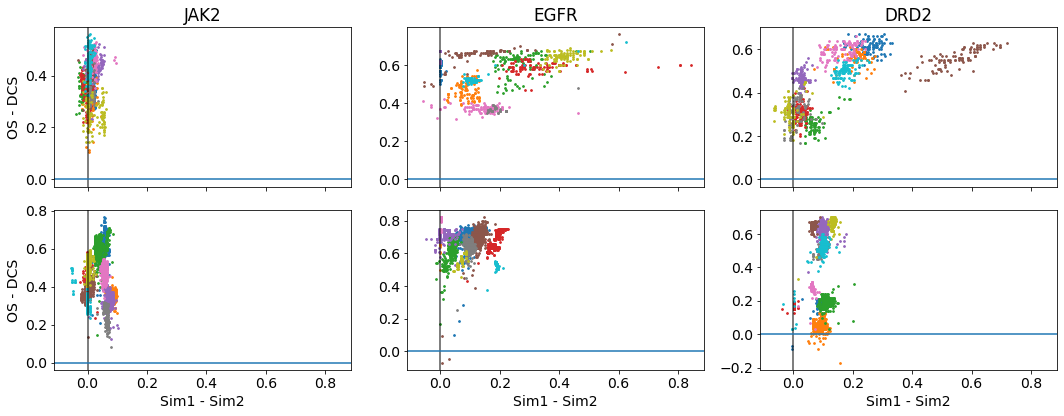

In [ ]:
xlabel = None
title = True

fig, axes = plt.subplots(nrows=2, ncols=len(chids), figsize=(15, 6), sharex=True)

for r_idx, (optimizer, opt_results) in enumerate(results.items()):
    print(optimizer)
    ymax = -1e15
    ylabel='OS - DCS'
    for c_idx, (chid, values) in enumerate(opt_results.items()):
        ax = axes[r_idx][c_idx]
        smiles_opt, preds1, preds2, nnd_train, nnd_test, nn_train, nn_test = values
        
        for d1, d2, p1, p2 in  zip(nnd_train, nnd_test, preds1, preds2):
            ax.scatter(-d1+d2, np.array(p1)-np.array(p2), s=3)
    
        ax.axvline(0, ymin=-1, ymax=1, c='black', lw=2, alpha=0.5)
        ax.axhline(0, xmin=-1, xmax=1)
#         plt.plot([-1,1], [-1,1], c='black', lw=2, alpha=0.5)
# #         plt.xlim((-0.1,1))
# #         plt.ylim((0,1))
#         plt.xlabel('Distance difference')
#         plt.ylabel('Prediction difference')
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ylabel=None
        if title:
            ax.set_title(chid2name[chid])
    title = False
#         _, yh = ax.get_ylim()
#         ymax = max(yh, ymax)
#         print(ymax)
#     for ax in axes[r_idx]:
#         ax.set_ylim((0,ymax))
    xlabel = 'Sim1 - Sim2'
#         plt.ylabel('Frequency')
#         plt.title(chid2name[chid])
#         plt.legend()
#         plt.show()
plt.tight_layout()


graph_ga
0.011, 0.018
0.170, 0.145
0.146, 0.165
lstm_hc
0.036, 0.033
0.077, 0.064
0.086, 0.033


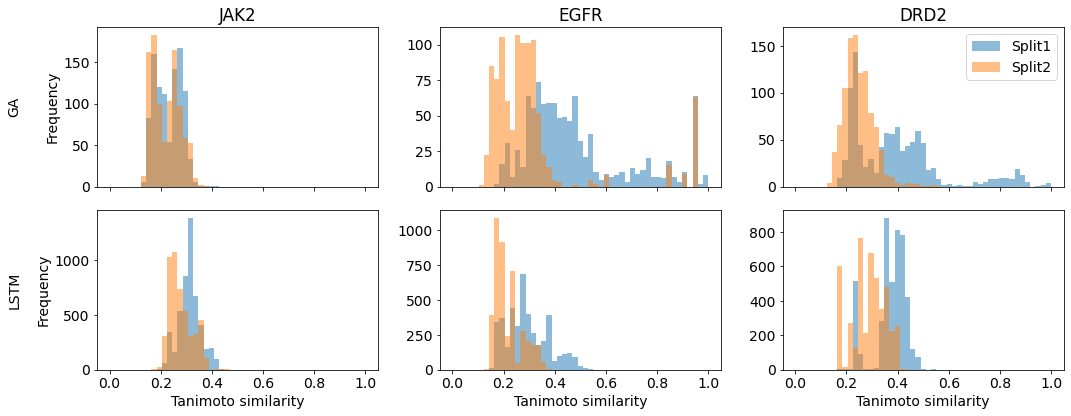

In [ ]:
xlabel = None
title = True

fig, axes = plt.subplots(nrows=2, ncols=len(chids), figsize=(15, 6), sharex=True)

for r_idx, (optimizer, opt_results) in enumerate(results.items()):
    print(optimizer)
    ymax = -1e15
    ylabel='Frequency'
    for c_idx, (chid, values) in enumerate(opt_results.items()):
        
        ax = axes[r_idx][c_idx]
        smiles_opt, preds1, preds2, nnd_train, nnd_test, nn_train, nn_test = values
        bins = np.linspace(0,1,50)
        alpha=0.5
        sims_train = 1-np.array(forfor(nnd_train))
        sims_test = 1-np.array(forfor(nnd_test))
        if (r_idx, c_idx) == (0, 2):
            label1, label2 = 'Split1', 'Split2'
        else:
            label1, label2 = None, None
            
        ax.hist(sims_train, bins=bins, alpha=alpha, label=label1)
        ax.hist(sims_test, bins=bins, alpha=alpha, label=label2)
        diff = sims_train-sims_test
        mean_diff = np.mean(diff)
        std_diff = np.std(diff)
        print(f"{mean_diff:.3f}, {std_diff:.3f}")
        if (r_idx, c_idx) == (0, 2):
#             ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.35), frameon=False, fontsize=16)
            ax.legend()
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ylabel=None
        if title:
            ax.set_title(chid2name[chid])
    title = False
#         _, yh = ax.get_ylim()
#         ymax = max(yh, ymax)
#         print(ymax)
#     for ax in axes[r_idx]:
#         ax.set_ylim((0,ymax))
    xlabel = 'Tanimoto similarity'
xtext = -0.4


# custom_lines = []
# fig.legend(custom_lines, list(legend_dict.values()), loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.03), frameon=False, fontsize=16)

axes[0][0].text(xtext, sum(axes[0][0].get_ylim()) / 2 , "GA", rotation=90, verticalalignment='center')
axes[1][0].text(xtext, sum(axes[1][0].get_ylim()) / 2, "LSTM", rotation=90, verticalalignment='center')
plt.tight_layout()
plt.savefig('./figures/NND_hist.pdf')

In [ ]:
nn_train = [smiles_train[i] for i in idx_train[:,0]]
nn_test = [smiles_test[i] for i in idx_test[:,0]]
from rdkit import Chem
from rdkit.Chem import Draw
# from svglib.svglib import svg2rlg
# from reportlab.graphics import renderPDF

from IPython.display import display, SVG
mols_per_row = 3


pairs = [smiles_opt, nn_train]
mols_per_row = len(pairs)

plot_mols = [m7s(s) for s in forfor(zip(*pairs))]
img = Draw.MolsToGridImage(plot_mols,molsPerRow=mols_per_row,subImgSize=(200,90))
display(img)